<a href="https://colab.research.google.com/github/MarioCalvarro/practicasIA/blob/main/P2_clustering_enunciado_2324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: E__

__Nombres de los estudiantes: Mario Calvarro Marines & Beñat Perez de Arenaza Eizaguire__

In [12]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [13]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [ ]:
df.describe().transpose()

En primer lugar, analizaremos una a una las variables numéricas:

####Habitaciones

In [ ]:
df['total_rooms'].describe().transpose()

In [ ]:
df["total_rooms"].plot(kind="density", xlim=[0, 40000])

En la gráfica podemos observar que la mayoría de distritos tienen entre 1 y 4000 habitaciones (lo que posiblemente sean comunidades de viviendas unifamiliares). Sin embargo, existe algún distrito (posiblemente en las grandes ciudades) con hasta 40000 habitaciones.

####Dormitorios

In [ ]:
df['total_bedrooms'].describe().transpose()

In [ ]:
df["total_bedrooms"].plot(kind="density", xlim=[0, 6500])

Al ser el número de dormitorios una variable muy similar al número de habitaciones, tenemos que estas dos variables siguen una distribución muy similar (y una no aporta mucha información nueva con respecto a la otra).

####Población

In [ ]:
df['population'].describe().transpose()

In [ ]:
df["population"].plot(kind="density", xlim=[0, 36000])

De nuevo, esta variable nos aporta aproximadamente la misma información que las dos anteriores.

####Hogares

In [ ]:
df['households'].describe().transpose()

In [ ]:
df["households"].plot(kind="density", xlim=[0, 6100])

Véase el anterior comentario.

####Ingresos

In [ ]:
df['median_income'].describe().transpose()

In [ ]:
df["median_income"].plot(kind="density", xlim=[0, 16])

Esta gráfica nos indica el salario medio mensual de las distintas comunidades. Como se puede apreciar, en el estado de California se ofrecen (de manera más o menos general) salarios bastante competitivos (entre 2 y 6 mil dolares), aunque también existen algunas comunidades con salarios aún mayores (hasta 16mil dolares de media) y menores.

####Valor

In [ ]:
df['median_house_value'].describe().transpose()

In [ ]:
df["median_house_value"].plot(kind="density", xlim=[0, 550000])

En este caso podemos apreciar que los hogares en California tienen un alto valor ya que la mayoría se encuentran entre los 100mil y 400mil dólares. Sin embargo, es posible que en la recogida de datos se haya establecido un límite superior arbitrario en los 500mil dolares puesto que en este punto aparece una subida muy rápida en el número de comunidades en las que el valor medio es exactamente este número.

#### Antigüedad

In [ ]:
df['housing_median_age'].describe().transpose()

In [ ]:
df["housing_median_age"].plot(kind="density", xlim=[0, 54])

Podemos apreciar que la mediana de antigüedad de los hogares en las distintas comunidades de California tiene una gran variabilidad siendo el rango más común entre los 15 y los 40 años, aunque también existe un elevado número de comunidades con hogares bastante viejos (50 años).

#### Relaciones
A continuación, mostraremos una imagen global de todos los pares de variables. De estos, analizaremos los más relevantes uno a uno.

In [ ]:
sns.pairplot(df)

Para comenzar, calculemos la matriz de correlación de las variables para decidir qué pares de variables serán intersantes de comparar; si dos variables tiene una correlación baja en valor absoluto, no tendrá mucho interés compararlos, ya que probablemente no podramos sacar nada en claro de ello. No obstante, si la correlación es alta, entonces la comparación podrá llevarnos a inferir ciertas conclusiones. En este caso, consideraremos por alta aquella correlación que sea superior a 0.65. Esto es, analizaremos el comportamiento de aquellas duplas de variable culla correlación en valor absoluto sea mayor que 0.65.

In [ ]:
df.corr()

#### Longitud/Latitud
Veamos donde se sitúan las distintas viviendas a través de la relación entre longitud y latitud.

In [ ]:
df.plot.scatter(x='longitude', y='latitude', c='lime')

Podemos apreciar el contorno del estado de California así como su geografía (donde hay desierto y montañas podemos encontrar menos hogares).

#### Habitaciones totales/Geografía


In [ ]:
import plotly.express as px

# El gráfico muestra con un color más intenso los cuadrados (que son la suma de todos los puntos
# de datos contenidos en ellos) con un valor mayor
fig = px.density_heatmap(df, x='longitude', y='latitude', z='total_bedrooms',
                         color_continuous_scale='Brwnyl',
                         nbinsx=1000, nbinsy=500,)
fig.update_layout(title='Mapa de calor de California con \"total_bedrooms\" como densidad',
                  xaxis_title='Longitude',
                  yaxis_title='Latitude')

fig.show()

En el anterior gráfico podemos apreciar (con un mapa de calor) los lugares en los que se concentran los distritos con un número alto de número de habitaciones. Claramente, estos se corresponden con las métropolis de California (zonas de San Franciso y Los Ángeles).

#### Antigüedad/Geografía

In [ ]:
fig = px.scatter(df, x='longitude', y='latitude', color='housing_median_age',
                 color_continuous_scale='Brwnyl')

fig.update_layout(title='California Scatter Plot: Housing Median Age',
                  xaxis_title='Longitude',
                  yaxis_title='Latitude')

fig.show()

En la anterior gráfica podemos apreciar donde se está aumentanto la oferta de hogares en California al fijarnos en los lugares con comunidades con hogares relativamente modernos (inferior a 10 años). Por ejemplo, podemos destacar la zona el este de Los Ángeles con un número relativamente elevado de comunidades con hogares nuevos.

#### Habitaciones totales/Dormitorios totales

In [ ]:
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms', color='lime')
sns.regplot(data=df, x='total_rooms', y='total_bedrooms', scatter=False, color='blue')

Como podemos apreciar la relación entre estas dos variables es lineal de forma que, como hemos indicado anteriormente, la información que nos aporta una es similar a la aportada por la otra. Esto se aplica a todas las variables que hemos dicho anteriormente (habitaciones totales, dormitorios totales, población y número de casas).

#### Ingresos  / Valor de la casa

In [ ]:
df.plot.scatter(x='median_income', y='median_house_value', c='lime')

En esta nueva gráfica podemos observar que, por lo general, a mayor mediana de ingresos en una comunidad, mayor será la mediana del valor de los hogares. Sin embargo, como hemos dicho anteriormente, resulta bastante extraño la acumulación de puntos con un "median_house_value" de exactamente 500mil dólares, posiblemente debido a una recogida incorrecta de datos o un límite arbitrario impuesto por el creador del _dataset_.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [ ]:
df['ocean_proximity'].describe().transpose()

In [ ]:
df["ocean_proximity"].value_counts().plot(kind='bar')

Podemos apreciar que la mayoría de hogares se encuentran cercanos al océano (<1H OCEAN, INLAND, NEAR_BAY), pero también existe un elevado número de comunidades en el interior del estado. Cabe destacar también que existe un reducido, y posiblemente exclusivo, número de distritos en islas.

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

### 3.1) Subconjunto de variables
Como hemos venido adelantando, en el _dataset_ nos encontramos con múltiples variables que, de una forma u otra, nos aportan la misma información. Por esta razón, consideramos que lo mejor que podemos hacer es tomar un tipo de variables como representante de estas e ignorar el resto. Las variables que aportan la misma información son total_rooms, total_bedrooms, population y households. Como representante tomaremos _population_.
Por otro lado, la variable categórica que representa la distancia al mar ya es tenida en cuenta cuando vemos la longitud y la latitud del conjunto. Por ello, también la eliminaremos.

In [14]:
df2 = df.drop(columns=["total_rooms", "total_bedrooms", "households", "ocean_proximity"])

In [15]:
df2

,longitude,latitude,housing_median_age,population,median_income,median_house_value
0,-122.23,37.88,41.0,322.0,8.3252,452600.0
1,-122.22,37.86,21.0,2401.0,8.3014,358500.0
2,-122.24,37.85,52.0,496.0,7.2574,352100.0
3,-122.25,37.85,52.0,558.0,5.6431,341300.0
4,-122.25,37.85,52.0,565.0,3.8462,342200.0
...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,1.5603,78100.0
20636,-121.21,39.49,18.0,356.0,2.5568,77100.0
20637,-121.22,39.43,17.0,1007.0,1.7000,92300.0
20638,-121.32,39.43,18.0,741.0,1.8672,84700.0


### 3.2) Transformación de las variables

Considerando que todas las variables, después de eliminar las redundates, miden magnitudes en unidades completamente distintas (con la excepción de longitud/latitud), hemos considerado que lo mejor será llevarlas todas a una escala equivalente de entre 0 y 1. El caso de la geografía no nos dará problemas puesto que la longitud y la latitud se mueven en unas distancias más o menos equivalentes (una especie de cuadrado).

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Aplicamos Min-Max
min_max_scaler = MinMaxScaler()
df2_scaled = min_max_scaler.fit_transform(df2)
column_names = ["longitude", "latitude", "housing_median_age", "population", "median_income", "median_house_value"]
df2_scaled = pd.DataFrame(df2_scaled, columns=column_names)
df2_scaled

,longitude,latitude,housing_median_age,population,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.008941,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.067210,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.013818,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.015555,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.015752,0.230776,0.674638
...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.023599,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.009894,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.028140,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.020684,0.094295,0.143713


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [19]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """

    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))

    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))

    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)

    plt.show()

A continuación, vamos a generar los clusters de las parejas de variables que hemos mencionado al principio, y analizaremos cuál es el número óptimo de clusters para cada caso en concreto:

In [20]:
K_MAX = 10 # El rango de clusters irá de 2 a 10
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    km1 = KMeans(init='random', n_clusters=k, random_state=333)
    km1.fit(df2_scaled)
    #plot_clusters(X, km1.labels_, km1.cluster_centers_)
    davies_boulding[k-2] = davies_bouldin_score(df2_scaled, km1.labels_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

7


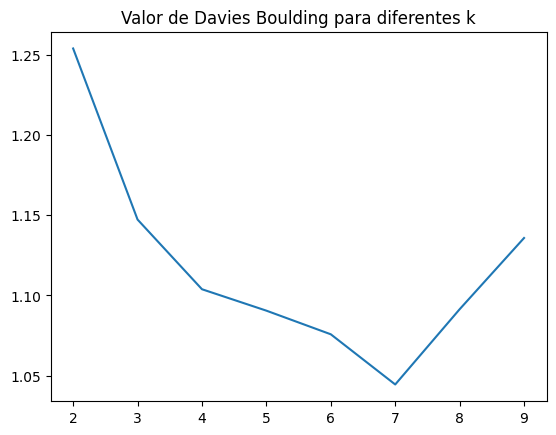

In [25]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')
opt_num_clusters = np.argmin(davies_boulding) + 2   #Empezamos con 2 clusters

Como podemos observar, el valor más bajo de Davies Boulding es para K=4, lo cual nos indica que el número óptimo de clusters es 4.



## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [26]:
km1 = KMeans(init='random', n_clusters=opt_num_clusters, random_state=333)
km1.fit(df2_scaled)
df1 = df.assign(cluster=pd.Series(data=km1.labels_))
df1.groupby(["cluster"]).describe().transpose()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster                               0              1              2  \
longitude          count    4265.000000    2678.000000    1304.000000   
                   mean     -117.724438    -121.666408    -122.282063   
                   std         0.849701       0.975883       0.254063   
                   min      -120.820000    -124.350000    -122.870000   
                   25%      -118.150000    -122.250000    -122.450000   
...                                 ...            ...            ...   
median_house_value min     14999.000000   14999.000000  131300.000000   
                   25%    133800.000000   79400.000000  275000.000000   
                   50%    177900.000000  114550.000000  341700.000000   
                   75%    231800.000000  169375.000000  437200.000000   
                   max    450000.000000  270000.000000  500001.000000   

cluster                               3              4              5  \
longitude          count    1676.000000    5369.000000    3261.000000   
                   mean     -121.973807    -118.086785    -121.229690   
                   std         0.468335       0.635450       1.106677   
                   min      -123.810000    -120.890000    -124.300000   
                   25%      -122.172500    -118.310000    -121.980000   
...                                 ...            ...            ...   
median_house_value min    171700.000000   14999.000000   14999.000000   
                   25%    250000.000000  121400.000000   87500.000000   
                   50%    286350.000000  164400.000000  118800.000000   
                   75%    352025.000000  208200.000000  158300.000000   
                   max    500001.000000  350000.000000  244000.000000   

cluster                               6  
longitude          count    2087.000000  
                   mean     -118.246023  
                   std         0.528841  
                   min      -120.670000  
                   25%      -118.435000  
...                                 ...  
median_house_value min    263700.000000  
                   25%    349050.000000  
                   50%    406300.000000  
                   75%    500001.000000  
                   max    500001.000000  

[72 rows x 7 columns]

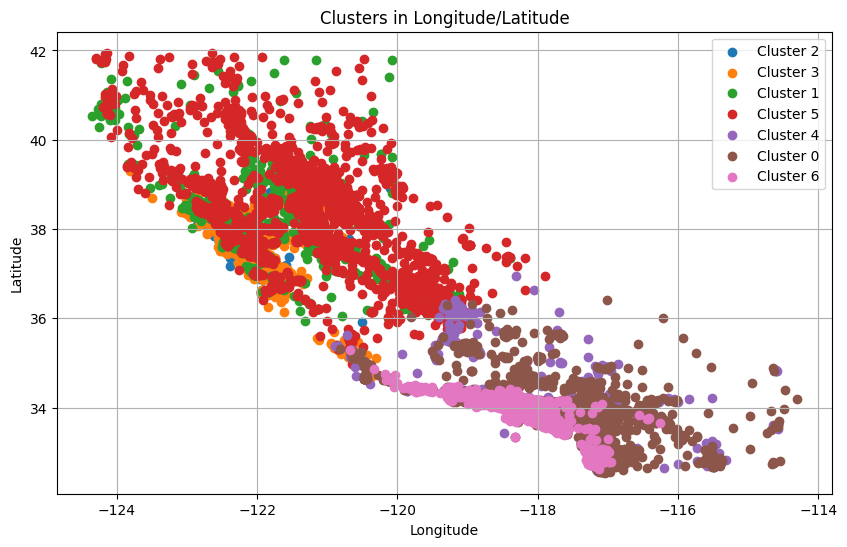

In [27]:
plt.figure(figsize=(10, 6))
for cluster_label in  df1['cluster'].unique()  :
    cluster_data = df1[df1['cluster'] == cluster_label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_label}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters in Longitude/Latitude')
plt.legend()
plt.grid(True)
plt.show()

Se puede apreciar que las manzanas de california están divididas sobre todo por su proximidad al mar. Es decir, son aquellas manzanas mas próximas a la costa las que más se asemejan entre sí,

## 6.1) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



In [ ]:
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
X=(df.loc[:,['longitude', 'latitude']]).values
for k in range(2, K_MAX):
    ag1 = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag1.fit(df2_scaled)

    davies_boulding[k-2] = davies_bouldin_score(df2_scaled, ag1.labels_)

In [ ]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Como podemos observar, el valor más bajo de Davies Boulding es para K=2, lo cual nos indica que el número óptimo de clusters es 2.


## 6.2) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [ ]:
ag1 = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
ag1.fit(df2_scaled)
df3 = df.assign(cluster=pd.Series(data=ag1.labels_))
df3.groupby(["cluster"]).describe().transpose()

In [ ]:
plt.figure(figsize=(10, 6))
for cluster_label in  df3['cluster'].unique()  :
    cluster_data = df3[df3['cluster'] == cluster_label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_label}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters in Longitude/Latitude')
plt.legend()
plt.grid(True)
plt.show()

Podemos apreciar que dado que exosten dos núcleos urbanos en el estado de California, cada cluster se corresponde con uno de ellos